### 20. 다음은 어느 회사의 남녀별 입사시험 성적이다. 이 데이터를 이용하여 남녀별 히스토그램, 점그림, 줄기-잎그림을 그려 분석하라.

|||
|---|---|
|남자|49 86 40 45 48 93 97 58 58 98<br>58 82 52 56 50 85 80 60 62 80<br>62 72 65 60 64 70 78 67 69 88|
|여자|60 72 66 65 75 78 62 64 74 58<br>68 72 67 61 62 72 79 71 74 73|


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 입력
male_scores_raw = '49 86 40 45 48 93 97 58 58 98 58 82 52 56 50 85 80 60 62 80 62 72 65 60 64 70 78 67 69 88'
female_scores_raw = '60 72 66 65 75 78 62 64 74 58 68 72 67 61 62 72 79 71 74 73'

# 줄바꿈 태그 제거 및 공백으로 분리
male_scores = [int(s) for s in male_scores_raw.split()]
female_scores = [int(s) for s in female_scores_raw.split()]

In [4]:
# 데이터프레임 생성
df_male = pd.DataFrame({'성별': '남자', '점수': male_scores})
df_female = pd.DataFrame({'성별': '여자', '점수': female_scores})
df = pd.concat([df_male, df_female], ignore_index=True)

In [30]:
print("--- 데이터 정보: describe() ---")
print(df.describe())
print("--- 데이터 정보: info() ---")
print(df.info())

--- 데이터 정보: describe() ---
              점수
count  50.000000
mean   68.100000
std    12.814612
min    40.000000
25%    60.000000
50%    67.000000
75%    74.750000
max    98.000000
--- 데이터 정보: info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      50 non-null     object
 1   점수      50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None


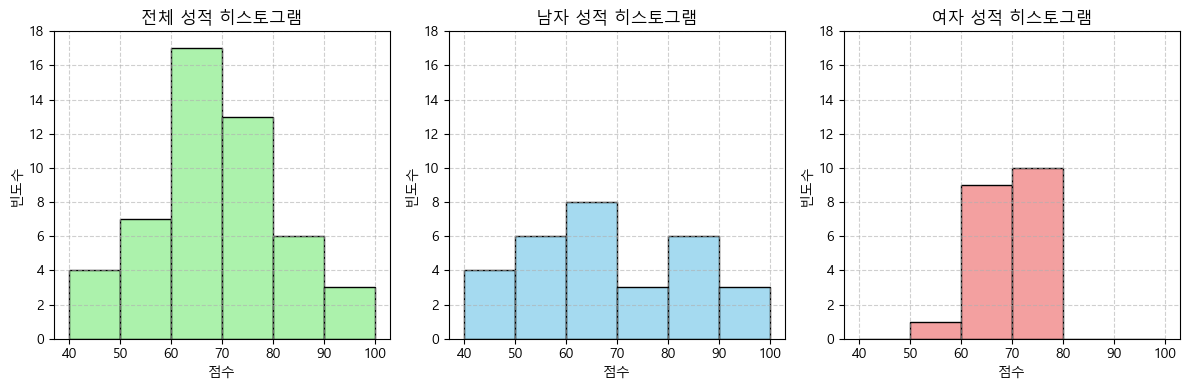

In [14]:
# 1. 히스토그램 (Histogram)

# 3개의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 히스토그램 설정
dataframes = [df, df_male, df_female]
titles = ['전체 성적 히스토그램', '남자 성적 히스토그램', '여자 성적 히스토그램']
colors = ['lightgreen', 'skyblue', 'lightcoral']
custom_bins = np.arange(40, 110, 10)
y_min = 0
y_max = 18

# 히스토그램 그리기
for i, ax in enumerate(axes):
    sns.histplot(dataframes[i], x='점수', bins=custom_bins, ax=axes[i], color=colors[i])
    ax.set_title(titles[i])    
    ax.set_xlabel('점수')
    ax.set_ylabel('빈도수')
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

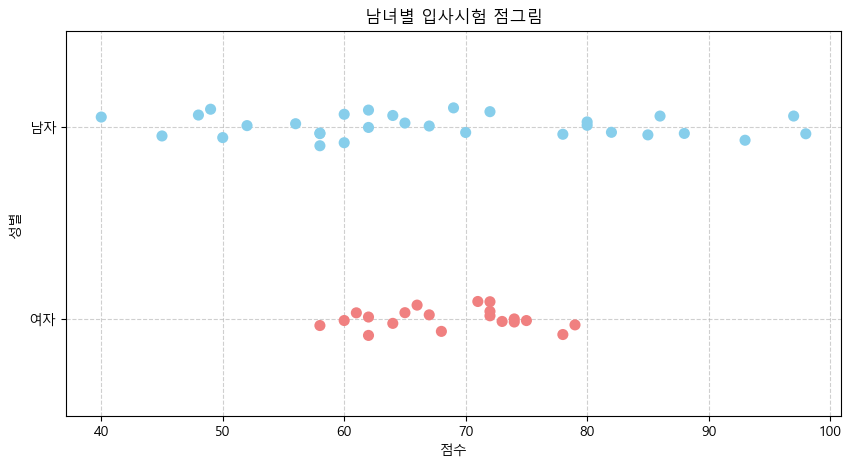

In [22]:
# 2. 점 그래프 (Dot Plot)

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 점 그래프 그리기
sns.stripplot(x='점수', y='성별', data=df, hue='성별', jitter=0.1, palette={'남자': 'skyblue', '여자': 'lightcoral'}, size=8)

# 그래프 제목, 축제목, 선모양, 투명도 설정
plt.title('남녀별 입사시험 점그림')
plt.xlabel('점수')
plt.ylabel('성별')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [27]:
# 3. 줄기-잎그림 (Stem-and-Leaf Plot)

# 줄기-잎그림 함수 정의
def stem_and_leaf_plot(data, leaf_unit=1):    
    # 1. 데이터 정렬
    sorted_data = sorted(data)
    
    # 2. 줄기와 잎으로 데이터 분리
    stem_dict = {}
    for value in sorted_data:
        # 줄기(stem)와 잎(leaf) 계산
        stem = int(value / (leaf_unit * 10))
        leaf = int(value % (leaf_unit * 10))
        
        # 딕셔너리에 줄기-잎 추가
        if stem not in stem_dict:
            stem_dict[stem] = []
        stem_dict[stem].append(leaf)

    # 3. 그림 출력
    for stem, leaves in stem_dict.items():
        # 줄기 출력
        stem_str = str(stem) # 줄기 부분만 표시
        
        # 잎(leaves) 출력
        leaf_str = ""
        for leaf in leaves:
            leaf_str += str(leaf) + " "
        
        print(f"{stem_str} | {leaf_str.strip()}")

# 남성 데이터 줄기-잎그림
print("--- 남자 성적 줄기-잎 그림 ---")
stem_and_leaf_plot(male_scores)

# 여성 데이터 줄기-잎그림
print("--- 여자 성적 줄기-잎 그림 ---")
stem_and_leaf_plot(female_scores)

--- 남자 성적 줄기-잎 그림 ---
4 | 0 5 8 9
5 | 0 2 6 8 8 8
6 | 0 0 2 2 4 5 7 9
7 | 0 2 8
8 | 0 0 2 5 6 8
9 | 3 7 8
--- 여자 성적 줄기-잎 그림 ---
5 | 8
6 | 0 1 2 2 4 5 6 7 8
7 | 1 2 2 2 3 4 4 5 8 9


### 21. 다음 데이터는 어느 도시의 8월 한 달 간의 최고기온을 기록한 것이다. 이 데이터에 대해 히스토그램, 점그림, 줄기-잎그림을 그려 비교하라.

29, 29, 34, 35, 35, 31, 32, 34, 38, 34, 33, 31, 31, 30, 34, 35,<br>
34, 32, 32, 29, 28, 30, 29, 31, 29, 28, 30, 29, 29, 27, 28

In [ ]:
temp_data = [29, 29, 34, 35, 35, 31, 32, 34, 38, 34, 33, 31, 31, 30, 34, 35, 34, 32, 32, 29, 28, 30, 29, 31, 29, 28, 30, 29, 29, 27, 28]

df_temp = pd.DataFrame({'8월_최고기온': temp_data})

In [37]:
print("--- 데이터 정보: describe() ---")
print(df_temp.describe())
print("--- 데이터 정보: info() ---")
print(df_temp.info())

--- 데이터 정보: describe() ---
         8월_최고기온
count  31.000000
mean   31.290323
std     2.710394
min    27.000000
25%    29.000000
50%    31.000000
75%    34.000000
max    38.000000
--- 데이터 정보: info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   8월_최고기온  31 non-null     int64
dtypes: int64(1)
memory usage: 380.0 bytes
None


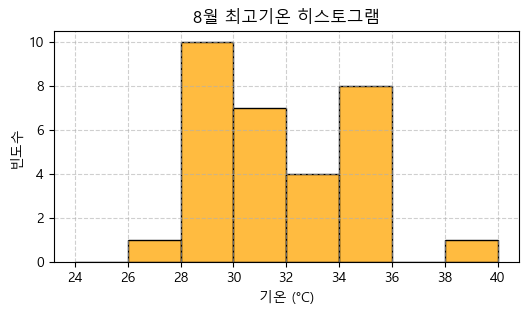

In [39]:
# 히스토그램
plt.figure(figsize=(6, 3))

sns.histplot(df_temp, x='8월_최고기온', bins=np.arange(24, 42, 2), color='orange')
plt.title('8월 최고기온 히스토그램')
plt.xlabel('기온 (°C)')
plt.ylabel('빈도수')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

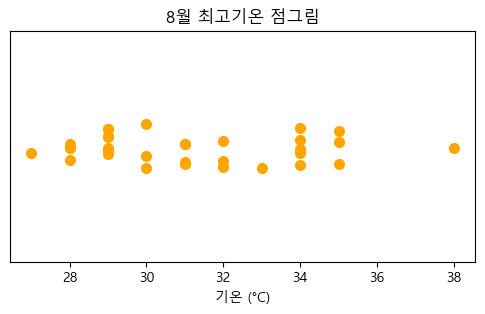

In [46]:
# 점 그래프
plt.figure(figsize=(6, 3))

sns.stripplot(x='8월_최고기온', data=df_temp, jitter=0.1, color='orange', size=8)
plt.title('8월 최고기온 점그림')
plt.xlabel('기온 (°C)')
plt.yticks([])  # y축 눈금 제거
plt.show()

In [47]:
# 줄기-잎그림
print("--- 8월 최고기온 줄기-잎 그림 ---")
stem_and_leaf_plot(temp_data)

--- 8월 최고기온 줄기-잎 그림 ---
2 | 7 8 8 8 9 9 9 9 9 9 9
3 | 0 0 0 1 1 1 1 2 2 2 3 4 4 4 4 4 5 5 5 8
